# Classification Problem : Finger Digits 0-5

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import necessary libraries

*   Library for matrix calculations numpy

*   Library for scientific plotting matplotlib

* Command (jupiter magic) %matplotlib inline says that all graphic output will be sent to the browser

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow import keras


import numpy as np
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
%matplotlib inline 

print(tf.__version__)

2.1.0


# Load data

In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"

In [0]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [0]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "One" in file_name else 2 if "Two" in file_name else 3 if "Three" in file_name else 4 if "Four" in file_name else 5 if "Five" in file_name else 0

train_path = "./train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files] 

In [0]:
def preprocess_image(img, side=128):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

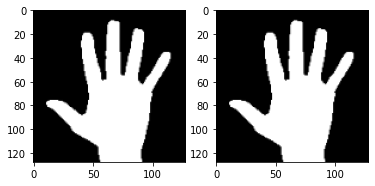

In [0]:
preview_index = 1002
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [0]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [0]:
train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)


(12006, 128, 128, 1) (12006,)


In [0]:
X = train_images
y = train_labels

In [0]:
np.shape(X)

(12006, 128, 128, 1)

We draw some images, each image is of 8x8 pixels. So each image has 64 features. First, construct a matrix from the feature vector.

In [0]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (128, 128)), interpolation = 'nearest')
    plt.text(0, 7, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')    

We draw first 60 images

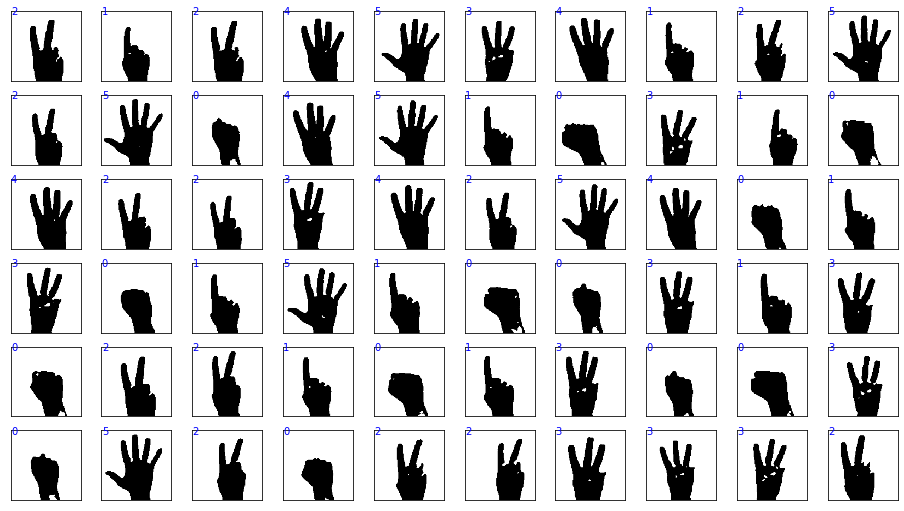

In [0]:
plt.figure(figsize = (16, 9))
for i_subplot in range(60):
    plt.subplot(6, 10, i_subplot + 1)
    draw_digit(X[i_subplot, :], y[i_subplot])

Break the data into train and test sets, by calling train_test_split 33% - for the test set, 67% - for the train set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


The size of the test and the train sets:

In [0]:
N_train = np.shape(X_train)
N_test = np.shape(X_test)
print(N_train, N_test)

(8044, 128, 128, 1) (3962, 128, 128, 1)


# Training the model
We'll train a simple neural network - multilayer perceptron (MLP)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)


In [0]:
X_train = X_train.reshape(8044,1*128*128)
X_test = X_test.reshape(3962,1*128*128)

In [0]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Now we can classify:
For example, let's take the 42nd image

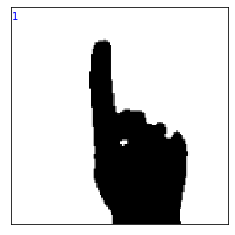

In [0]:
i = 16
Img = X_test[i, :]
dig = y_test[i]
draw_digit(Img, dig)

The classifier returns 1 which is correct

In [0]:
mlp_model.predict([Img])

array([1])

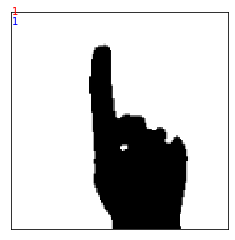

In [0]:
i = 16
Img = X_test[i, :]
dig = y_test[i]
dig_pred = mlp_model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

Now we input the entire training and the entire test set:



In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Train and test errors

In [0]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0


Train and test accuracy score

In [0]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 1.0


In [0]:
print(1 - mlp_model.score(X_test, y_test))

0.0


All erroneous cases: We have none

In [0]:
train_error_cases = np.where(y_train != y_train_pred)
test_error_cases = np.where(y_test != y_test_pred)
print(train_error_cases, test_error_cases)

(array([], dtype=int64),) (array([], dtype=int64),)


In [0]:
plt.figure(figsize = (16, 16))
i_subplot = 1 
for i in np.nditer(test_error_cases):
    Img = X_test[i, :]
    digit = y_test[i]
    digit_pred = y_test[i]
    plt.subplot(8, 8, i_subplot)
    draw_digit(Img, digit, digit_pred)
    i_subplot += 1

ValueError: ignored

<Figure size 1152x1152 with 0 Axes>

In [0]:
alpha_arr = np.logspace(-3, 2, num=1)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', 
                              random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [0]:
alpha_arr

In [0]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
#plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [0]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err, min_test_err)

In [0]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

In [0]:
alpha_opt = alpha_opt[0]

In [0]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

#Confusion matrix
Confusion matrix allows us to estimate the quality of the classifier. The rows of the matrix correspond to the real classes. The columns to the predicted classes. At the intersection of the row i and the columnj is the number of objects of the ith class, classified by the classifier as the jth class. In Python, all indices are numbered beginning from 0.

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[654   0   0   0   0   0]
 [  0 643   0   0   0   0]
 [  0   0 657   0   0   0]
 [  0   0   0 669   0   0]
 [  0   0   0   0 654   0]
 [  0   0   0   0   0 685]]


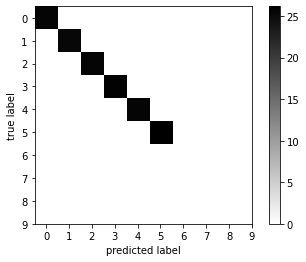

In [0]:
M = confusion_matrix(y_test, y_test_pred)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass


In [0]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test, y_test_pred) # Since Version 0.22

TypeError: ignored

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       643
           2       1.00      1.00      1.00       657
           3       1.00      1.00      1.00       669
           4       1.00      1.00      1.00       654
           5       1.00      1.00      1.00       685

    accuracy                           1.00      3962
   macro avg       1.00      1.00      1.00      3962
weighted avg       1.00      1.00      1.00      3962

